In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_validate
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
data1 = pd.read_excel(r'C:\Users\lenovo\Desktop\origin.xlsx',index_col=0)
data2 = pd.read_excel(r'C:\Users\lenovo\Desktop\validation.xlsx',index_col=0)

In [9]:
x_train = data1.iloc[:,0:-1]
y_train = data1.iloc[:,-1]
x_test = data2.iloc[:,0:-1]
y_true = data2.iloc[:,-1]
scaler = StandardScaler()
x_train_std = scaler.fit_transform(x_train)
x_test_std = scaler.fit_transform(x_test)
rfc = RandomForestClassifier(random_state = 42, n_estimators=100)
rfc = rfc.fit(x_train_std, y_train)
y_pred = rfc.predict(x_test_std)
y_pred

array(['South China', 'South China', 'South China', 'South China',
       'South China', 'South China', 'South China', 'South China',
       'South China', 'South China', 'South China', 'South China',
       'East China', 'East China', 'East China', 'East China',
       'East China', 'East China', 'East China', 'East China',
       'East China', 'North China', 'North China', 'North China',
       'North China', 'North China', 'North China', 'North China',
       'North China', 'North China'], dtype=object)

In [10]:
acc =  accuracy_score(y_true, y_pred)
report = classification_report(y_true, y_pred, digits=3)
cm = confusion_matrix(y_true, y_pred)
print("Accuracy: {:.3f}".format(acc))
print("\nClassification report:\n", report)
print("\nConfusion matrix:\n", cm)

Accuracy: 0.900

Classification report:
               precision    recall  f1-score   support

  East China      1.000     0.750     0.857        12
 North China      1.000     1.000     1.000         9
 South China      0.750     1.000     0.857         9

    accuracy                          0.900        30
   macro avg      0.917     0.917     0.905        30
weighted avg      0.925     0.900     0.900        30


Confusion matrix:
 [[9 0 3]
 [0 9 0]
 [0 0 9]]


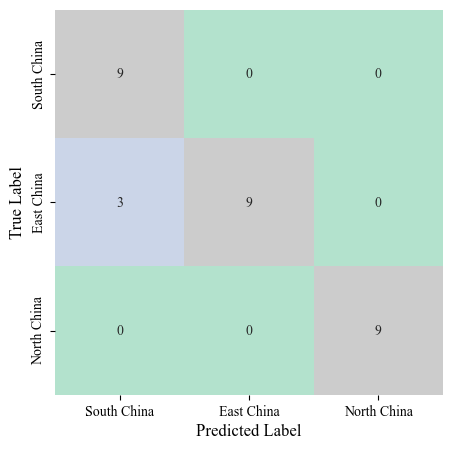

In [11]:
labels = ['South China','East China','North China']
cm = confusion_matrix(y_true, y_pred, labels=labels)
plt.rcParams['font.family'] = 'Times New Roman'
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Pastel2",
            xticklabels=labels, yticklabels=labels, cbar=False)

plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("True Label", fontsize=12)
plt.savefig('conf_matrix.svg',format='svg',dpi=300)
plt.show()